In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pandas as pd
from scipy.interpolate import CloughTocher2DInterpolator
from scipy.io import loadmat
%matplotlib inline

In [173]:
def ceo_modes(ceo_file):
    from collections import OrderedDict

    suit = OrderedDict()
    suit['Ni']     = np.array( 0,     dtype=np.int32)
    suit['L']      = np.array( 0,     dtype=np.double)
    suit['N_SET']  = np.array( 1,     dtype=np.int32)
    suit['N_MODE'] = np.array( 1,     dtype=np.int32)
    suit['s2b']    = np.array( [0]*7, dtype=np.int32)

    with open(ceo_file,'rb') as f:
        suit['Ni']     = np.fromfile(f, dtype=np.int32, count=1)
        suit['L']      = np.fromfile(f, dtype=np.double, count=1)
        suit['N_SET']  = np.fromfile(f, dtype=np.int32, count=1)
        suit['N_MODE'] = np.fromfile(f, dtype=np.int32, count=1)
        suit['s2b']    = np.fromfile(f, dtype=np.int32, count=7)
        suit['M']      = np.fromfile(f, dtype=np.double, count=-1)
    return suit

In [238]:

ls

 ASM_DDKLs_S7OC04184_675kls.ceo
'asm-nodes copy.ipynb'
 asm-nodes.ipynb
 KLmodesGS36.mat
 KLmodesGS36p.mat
 M2_OrthoNormGS36_KarhunenLoeveModes.ceo
 M2_OrthoNormGS36p_KarhunenLoeveModes.ceo
 M2_segment_axial_d.nodes.bin
 M2_segment_axial_d.nodes.parquet
 main.rs
 MC_M2_VC_delta_D.nodes.bin
 MC_M2_VC_delta_D.nodes.parquet


In [256]:
fqp = ceo_modes("ASM_DDKLs_S7OC04184_675kls.ceo")
rco = ceo_modes("M2_OrthoNormGS36p_KarhunenLoeveModes.ceo")

In [257]:
fqp_s1 = fqp['M'][:256*256*675].reshape(-1,256*256)
fqp_s7 = fqp['M'][256*256*675:].reshape(-1,256*256)

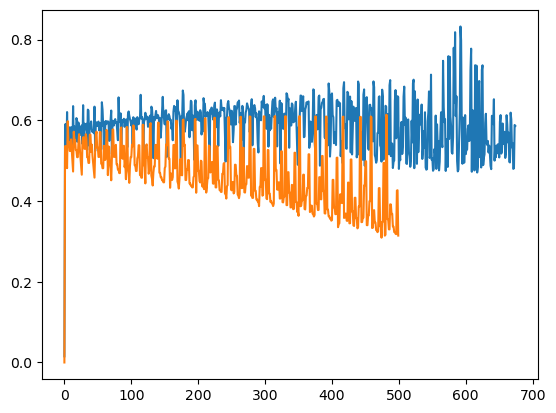

In [259]:
plt.plot(fqp_s1.std(1))
plt.plot(rco_s1.std(1))

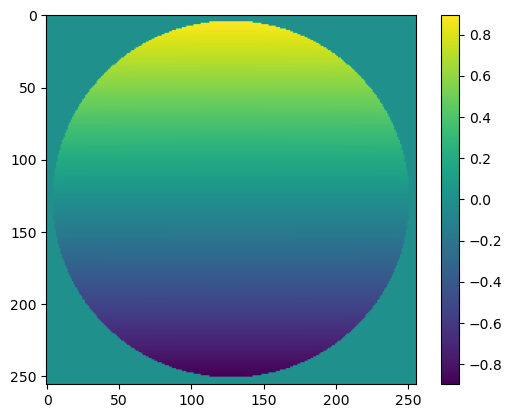

In [160]:
L = fqp['L'][0]/2
u = np.linspace(-1,1,int(fqp['Ni']))*L
x,y = np.meshgrid(u,u)
p = np.hypot(x,y)<r_max
fig,ax = plt.subplots()
h = ax.imshow(fqp_s7[1,:].reshape(256,256)*p)
fig.colorbar(h,ax=ax)

In [8]:
fqp

OrderedDict([('Ni', array([256], dtype=int32)),
             ('L', array([1.0415])),
             ('N_SET', array([2], dtype=int32)),
             ('N_MODE', array([675], dtype=int32)),
             ('s2b', array([0, 0, 0, 0, 0, 0, 1], dtype=int32)),
             ('M',
              array([0.51613252, 0.51635753, 0.5165888 , ..., 0.        , 0.        ,
                     0.        ]))])

In [260]:
rco

OrderedDict([('Ni', array([256], dtype=int32)),
             ('L', array([1.05])),
             ('N_SET', array([2], dtype=int32)),
             ('N_MODE', array([500], dtype=int32)),
             ('s2b', array([0, 0, 0, 0, 0, 0, 1], dtype=int32)),
             ('M',
              array([ 0.5      ,  0.5      ,  0.5      , ..., -0.2819404, -0.2819404,
                     -0.2819404]))])

In [258]:
rco_s1 = rco['M'][:256*256*500].reshape(-1,256*256)
rco_s7 = rco['M'][256*256*500:].reshape(-1,256*256)

In [241]:
rco_s1.std(1)

array([0.        , 0.52845615, 0.52842825, 0.50889825, 0.47652531,
       0.58646619, 0.53661847, 0.53701357, 0.51898889, 0.51918094,
       0.54314013, 0.51900608, 0.49811597, 0.4714047 , 0.56442971,
       0.5420926 , 0.54199776, 0.52094567, 0.52158991, 0.50423298,
       0.50430153, 0.5346662 , 0.55473145, 0.52547569, 0.50563521,
       0.49099763, 0.4643399 , 0.54190732, 0.54750815, 0.54767407,
       0.52363465, 0.52355138, 0.55447213, 0.54415144, 0.50495812,
       0.50578891, 0.49100017, 0.49101878, 0.55348958, 0.55306667,
       0.51630531, 0.5329777 , 0.50807532, 0.49211807, 0.48312767,
       0.45736197, 0.5209039 , 0.5520001 , 0.56023925, 0.52574193,
       0.52581921, 0.50592028, 0.50596428, 0.55887555, 0.55908934,
       0.48958134, 0.49094587, 0.47937481, 0.47946011, 0.53010822,
       0.52165811, 0.49898911, 0.51277388, 0.56409704, 0.55894918,
       0.47704209, 0.5279409 , 0.52753364, 0.49187597, 0.47917096,
       0.45122645, 0.50207322, 0.56466763, 0.5645305 , 0.50569

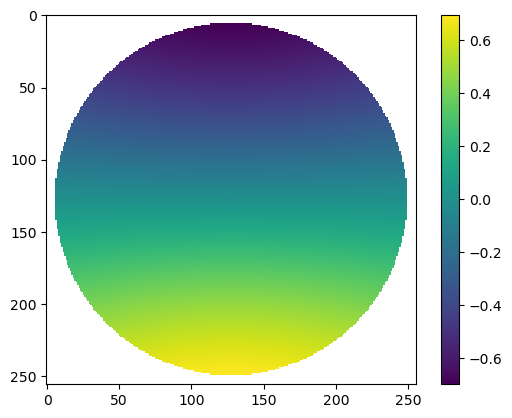

In [209]:
fig,ax = plt.subplots()
h = ax.imshow(10*rco_s1[1,:].reshape(256,256))
fig.colorbar(h,ax=ax)

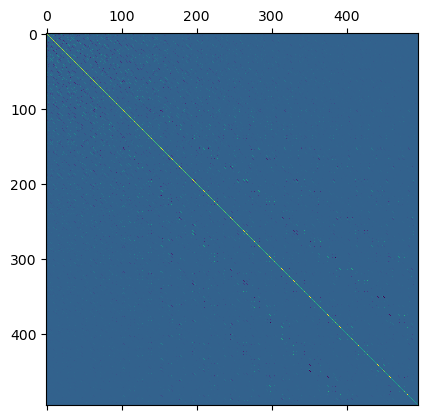

In [181]:
Q = rco_s1@rco_s1.T
plt.matshow(Q)


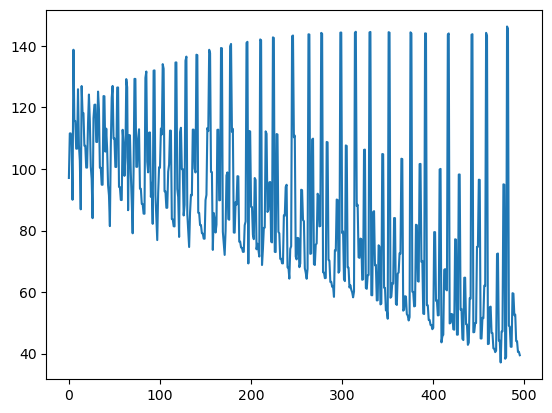

In [182]:
plt.plot(np.diag(Q))

In [183]:
data = loadmat("KLmodesGS36p.mat")
data["KL_1"].shape

(675, 500)

In [184]:
np.max(data['KL_7'])

0.18578894315271252

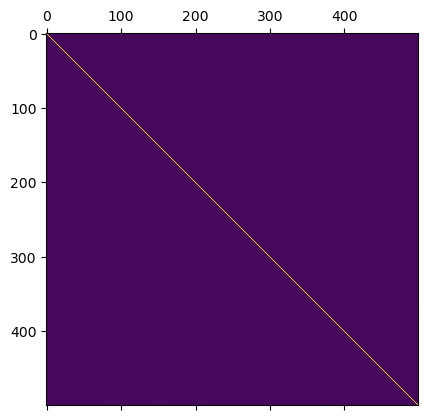

In [185]:
Q = data["KL_7"].T@data["KL_7"]
plt.matshow(Q)

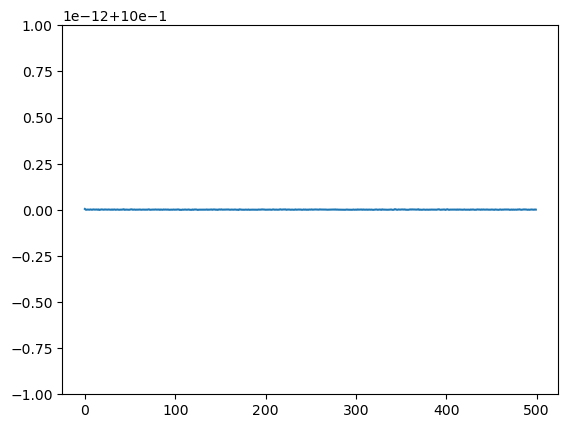

In [186]:
plt.plot(np.diag(Q))

In [187]:
nodes.shape,data['KL_1'][:,0].shape

((675, 3), (675,))

In [188]:
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S1"])
r = np.hypot(nodes[:,0],nodes[:,1])
r_max = r.max()
triang = tri.Triangulation(nodes[:,0],nodes[:,1])

In [189]:
rco

OrderedDict([('Ni', array([256], dtype=int32)),
             ('L', array([1.05])),
             ('N_SET', array([2], dtype=int32)),
             ('N_MODE', array([500], dtype=int32)),
             ('s2b', array([0, 0, 0, 0, 0, 0, 1], dtype=int32)),
             ('M',
              array([ 0.03849002,  0.03849002,  0.03849002, ..., -0.02170376,
                     -0.02170376, -0.02170376]))])

In [190]:
L = rco['L'][0]/2
u = np.linspace(-1,1,int(rco['Ni']))*L
x,y = np.meshgrid(u,u)
p = np.hypot(x,y)<r_max
e = [-L,L,-L,L]
e

[-0.525, 0.525, -0.525, 0.525]

In [191]:
pwd

'/home/rconan/Dropbox/projects/dos-actors/clients/m2-ctrl/examples/asm-nodes'

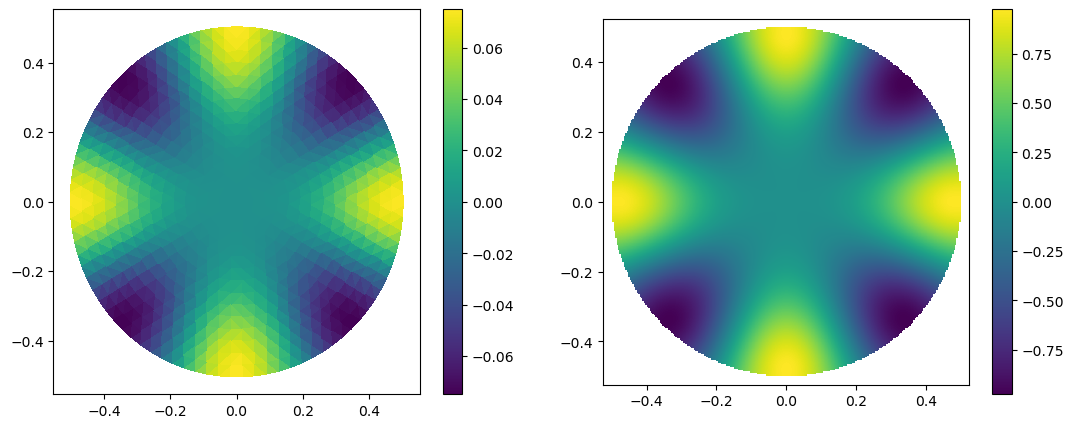

In [262]:
sid = 1
i = 10
nodes = np.vstack(df[f"S{sid}"])
r = np.hypot(nodes[:,0],nodes[:,1])
r_max = r.max()
triang = tri.Triangulation(nodes[:,0],nodes[:,1])

fig,axs  = plt.subplots(ncols=2,figsize=(13,5))
ax = axs[0]
mm = data[f'KL_{sid}'][:,i]
h = ax.tripcolor(triang,mm,vmin=mm.min(),vmax=mm.max())
#h = ax.set_aspect('equal')
fig.colorbar(h,ax=ax)
ax = axs[1]
if sid==7:
    m = rco_s7[i,:].reshape(256,256)
else:
    m = rco_s1[i,:].reshape(256,256)
m[~p] = np.nan
h = ax.imshow(m,extent=e)
fig.colorbar(h,ax=ax)

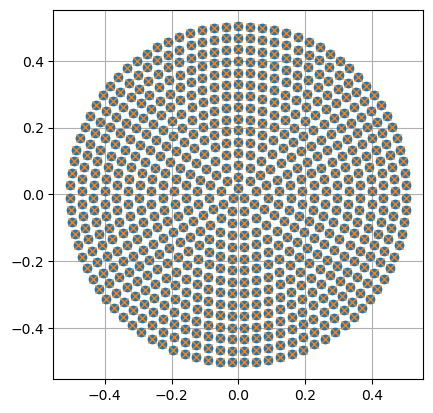

In [7]:
fig, ax = plt.subplots()
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S1"])
ax.plot(*nodes[:,:2].T,'o')
df = pd.read_parquet("MC_M2_VC_delta_D.nodes.parquet")
nodes = np.vstack(df["S1"])
ax.plot(*nodes[:,:2].T,'x')
ax.set_aspect('equal')
ax.grid()

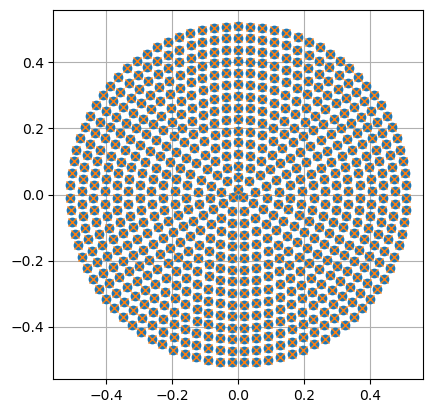

In [50]:
fig, ax = plt.subplots()
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S7"])
ax.plot(*nodes[:,:2].T,'o')
df = pd.read_parquet("MC_M2_VC_delta_D.nodes.parquet")
nodes = np.vstack(df["S7"])
ax.plot(*nodes[:,:2].T,'x')
ax.set_aspect('equal')
ax.grid()

In [ ]:
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S1"])
clough = CloughTocher2DInterpolator(nodes,s1[:500,:])